# Distribuição dos nomes no Brasil, segundo dados do Censo IBGE 2010

In [1]:
import pandas as pd

In [2]:
data_raw = pd.read_csv("prenomes/data/nomes-censos-ibge.csv")

In [3]:
data_raw.head()

,Nome,ate1930,ate1940,ate1950,ate1960,ate1970,ate1980,ate1990,ate2000,ate2010
0,MARIA,336477.0,749053.0,1487042.0,2476482.0,2495491.0,1616019.0,917968.0,544296.0,1111301.0
1,ANA,33395.0,56160.0,101259.0,183941.0,292835.0,421531.0,529266.0,536302.0,935169.0
2,JOAO,60155.0,141772.0,256001.0,396438.0,429148.0,279975.0,273960.0,352552.0,794118.0
3,GABRIEL,1267.0,2744.0,4256.0,6095.0,6559.0,9103.0,46996.0,271405.0,584024.0
4,LUCAS,388.0,937.0,1593.0,2787.0,4425.0,9954.0,84484.0,517436.0,505306.0


In [4]:
data_raw["Soma"] = data_raw['ate1930'] + data_raw['ate1940'] + data_raw['ate1950'] + data_raw['ate1960'] + data_raw['ate1970'] + data_raw['ate1980'] + data_raw['ate1990'] + data_raw['ate2000'] + data_raw['ate2010']

In [5]:
data = data_raw[['Nome', 'Soma']]

In [6]:
data.head()

,Nome,Soma
0,MARIA,11734129.0
1,ANA,3089858.0
2,JOAO,2984119.0
3,GABRIEL,932449.0
4,LUCAS,1127310.0


In [7]:
data.tail()

,Nome,Soma
64454,FUJIE,NaN
64455,GIUSEPINA,NaN
64456,NELLO,NaN
64457,SYLLA,NaN
64458,VENOZINA,NaN


In [8]:
data.shape

(64459, 2)

In [9]:
data.describe

<bound method NDFrame.describe of             Nome        Soma
0          MARIA  11734129.0
1            ANA   3089858.0
2           JOAO   2984119.0
3        GABRIEL    932449.0
4          LUCAS   1127310.0
...          ...         ...
64454      FUJIE         NaN
64455  GIUSEPINA         NaN
64456      NELLO         NaN
64457      SYLLA         NaN
64458   VENOZINA         NaN

[64459 rows x 2 columns]>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64459 entries, 0 to 64458
Data columns (total 2 columns):
Nome    64458 non-null object
Soma    2853 non-null float64
dtypes: float64(1), object(1)
memory usage: 1007.3+ KB


In [11]:
data = data.dropna()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2853 entries, 0 to 29540
Data columns (total 2 columns):
Nome    2853 non-null object
Soma    2853 non-null float64
dtypes: float64(1), object(1)
memory usage: 66.9+ KB


In [13]:
data.shape

(2853, 2)

In [27]:
data.sample(5)

,Nome,Soma
15749,AFRA,1198.0
3512,NOELIA,11247.0
16417,HILDEBRANDO,2612.0
166,MANUELA,61231.0
26567,VIRGINA,690.0


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import string
import numpy as np

In [16]:
alfabeto = list(string.ascii_uppercase)

In [17]:
alfabeto.index("A")

0

In [18]:
quantidade = np.zeros(len(alfabeto))

In [19]:
quantidade

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
len(alfabeto)

26

In [21]:
for index, row in data.iterrows():
    for letra in alfabeto:
        if letra == row["Nome"][0]:
            quantidade[alfabeto.index(letra)] += row["Soma"]

In [22]:
quantidade

array([1.7275303e+07, 2.7024940e+06, 7.6404330e+06, 4.9071660e+06,
       7.4449040e+06, 6.6492110e+06, 4.9950830e+06, 1.2095900e+06,
       3.4384540e+06, 1.5749181e+07, 2.0545300e+05, 1.0060237e+07,
       2.2603221e+07, 2.8666790e+06, 1.1773520e+06, 3.9829610e+06,
       3.8101000e+04, 9.2353200e+06, 5.4801090e+06, 2.7257930e+06,
       8.9502000e+04, 5.1407480e+06, 1.0012960e+06, 1.8000000e+03,
       4.3565000e+04, 4.0486700e+05])

In [23]:
alfabeto = np.array(alfabeto)

In [24]:
alfabeto

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='<U1')

In [25]:
quantidade

array([1.7275303e+07, 2.7024940e+06, 7.6404330e+06, 4.9071660e+06,
       7.4449040e+06, 6.6492110e+06, 4.9950830e+06, 1.2095900e+06,
       3.4384540e+06, 1.5749181e+07, 2.0545300e+05, 1.0060237e+07,
       2.2603221e+07, 2.8666790e+06, 1.1773520e+06, 3.9829610e+06,
       3.8101000e+04, 9.2353200e+06, 5.4801090e+06, 2.7257930e+06,
       8.9502000e+04, 5.1407480e+06, 1.0012960e+06, 1.8000000e+03,
       4.3565000e+04, 4.0486700e+05])

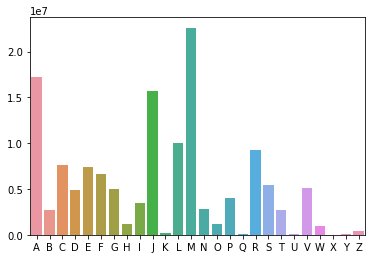

In [26]:
sns.barplot(x=alfabeto, y=quantidade)